In [1]:
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # Importing matplotlib for plotting graphs and visualizations
import seaborn as sns  # For advanced data visualization and styling
import numpy as np  # For numerical operations and array manipulations
from datetime import datetime  # To work with date and time data
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.linear_model import LinearRegression  # Linear regression model for prediction
from sklearn.ensemble import RandomForestRegressor  # Random Forest model for regression tasks
from sklearn.metrics import mean_squared_error, mean_absolute_error  # For evaluating model performance
from sklearn.linear_model import Ridge, Lasso  # Ridge and Lasso regression for regularization
from sklearn.ensemble import GradientBoostingRegressor  # Gradient Boosting model for regression tasks
from sklearn.model_selection import train_test_split, cross_val_score  # Data splitting and cross-validation

In [2]:
## Step 1: Load and Inspect Data

df = pd.read_excel('2020-2024-emergency-shelter-occupancy.xlsx')

# Display the first 5 rows
df.head()

,date,city,ShelterName,Capacity,Overnight,year,month
0,2020-01-01,Edmonton,WEAC,66.0,62.0,2020,1
1,2020-01-01,Edmonton,Hope Mission - Intox Centre,70.0,67.0,2020,1
2,2020-01-01,Edmonton,Hope Mission - Herb Jamieson Centre,0.0,0.0,2020,1
3,2020-01-01,Edmonton,Hope Mission - Herb Jamieson Winter Emergency,60.0,0.0,2020,1
4,2020-01-01,Edmonton,Hope Mission - Mat Emergency Shelter Program,170.0,159.0,2020,1


In [3]:
#2) Report data types of each column
data_types = df.dtypes
print("Data Types of Each Column:\n", data_types)

# Count categorical and numerical columns
num_categorical = sum(data_types == 'object')
num_numerical = sum((data_types == 'int64') | (data_types == 'float64'))

# Print the number of Numerical and Categorical Columns
print(f"\nNumber of Categorical Columns: {num_categorical}")
print(f"Number of Numerical Columns: {num_numerical}")

Data Types of Each Column:
 date           datetime64[ns]
city                   object
ShelterName            object
Capacity              float64
Overnight             float64
year                    int64
month                   int64
dtype: object

Number of Categorical Columns: 2
Number of Numerical Columns: 4


In [4]:
#3) # Display the basic statistical summary of numerical columns
print("Statistical summary of numerical columns\n")
df.describe()

Statistical summary of numerical columns



,date,Capacity,Overnight,year,month
count,189166,182925.000000,183838.000000,189166.000000,189166.000000
mean,2022-08-27 02:23:46.480445440,36.742485,26.789347,2022.166446,6.368713
min,2020-01-01 00:00:00,0.000000,0.000000,2020.000000,1.000000
25%,2021-07-25 00:00:00,0.000000,0.000000,2021.000000,4.000000
50%,2022-09-29 00:00:00,0.000000,0.000000,2022.000000,6.000000
75%,2023-10-24 00:00:00,40.000000,24.000000,2023.000000,9.000000
max,2024-09-30 00:00:00,1028.000000,899.000000,2024.000000,12.000000
std,NaN,99.914505,71.793348,1.334213,3.345723


In [5]:
## Step 2: Check for Missing Values and Clean Data
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Handle missing values (e.g., fill with 0 or drop, depending on analysis needs)
df['Capacity'].fillna(0, inplace=True)
df['Overnight'].fillna(0, inplace=True)

# Drop duplicates if any
df.drop_duplicates(inplace=True)


Missing values:
 date              0
city              0
ShelterName       0
Capacity       6241
Overnight      5328
year              0
month             0
dtype: int64


<ipython-input-5-48157315a032>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Capacity'].fillna(0, inplace=True)
<ipython-input-5-48157315a032>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method

In [6]:
#Step 3: Descriptive Statistics

# Summary statistics for numerical columns
print(df.describe())

# Check unique values for categorical columns
print("Unique cities:", df['city'].unique())
print("Unique shelter names:", df['ShelterName'].nunique())


                                date       Capacity      Overnight  \
count                         188516  188516.000000  188516.000000   
mean   2022-08-25 16:50:15.570031360      35.652777      26.124573   
min              2020-01-01 00:00:00       0.000000       0.000000   
25%              2021-07-23 00:00:00       0.000000       0.000000   
50%              2022-09-27 00:00:00       0.000000       0.000000   
75%              2023-10-22 00:00:00      35.000000      22.000000   
max              2024-09-30 00:00:00    1028.000000     899.000000   
std                              NaN      98.618890      71.019352   

                year          month  
count  188516.000000  188516.000000  
mean     2022.162814       6.366340  
min      2020.000000       1.000000  
25%      2021.000000       4.000000  
50%      2022.000000       6.000000  
75%      2023.000000       9.000000  
max      2024.000000      12.000000  
std         1.334332       3.347039  
Unique cities: ['Edmonton' 

In [7]:
# Step 4: Feature Engineering

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day


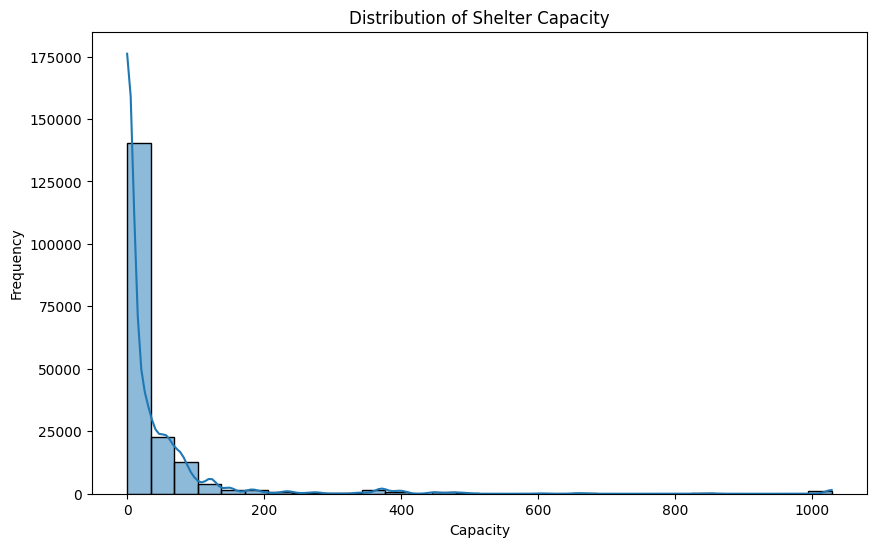

In [21]:
# Step 5: Data Visualization

# 1.Univariate Analysis

# Histogram for Capacity
plt.figure(figsize=(10, 6))
sns.histplot(df['Capacity'], bins=30, kde=True)
plt.title("Distribution of Shelter Capacity")
plt.xlabel("Capacity")
plt.ylabel("Frequency")
plt.title("Distribution of Shelter Capacity")
plt.show()


The graph illustrates the distribution of shelter capacity, highlighting a heavily right-skewed pattern. Most shelters have a small capacity, as evidenced by the highest frequency of values concentrated near the lower end of the capacity scale, around zero. The histogram bars show the count of shelters for various capacity ranges, while the smooth Kernel Density Estimation (KDE) curve overlays the data, providing a probability density estimate. The rapid decline in frequency as capacity increases, along with a long tail extending towards higher capacities, suggests that a majority of shelters have relatively limited capacity, with only a few accommodating significantly larger numbers. This distribution emphasizes the prevalence of smaller shelters in the dataset.

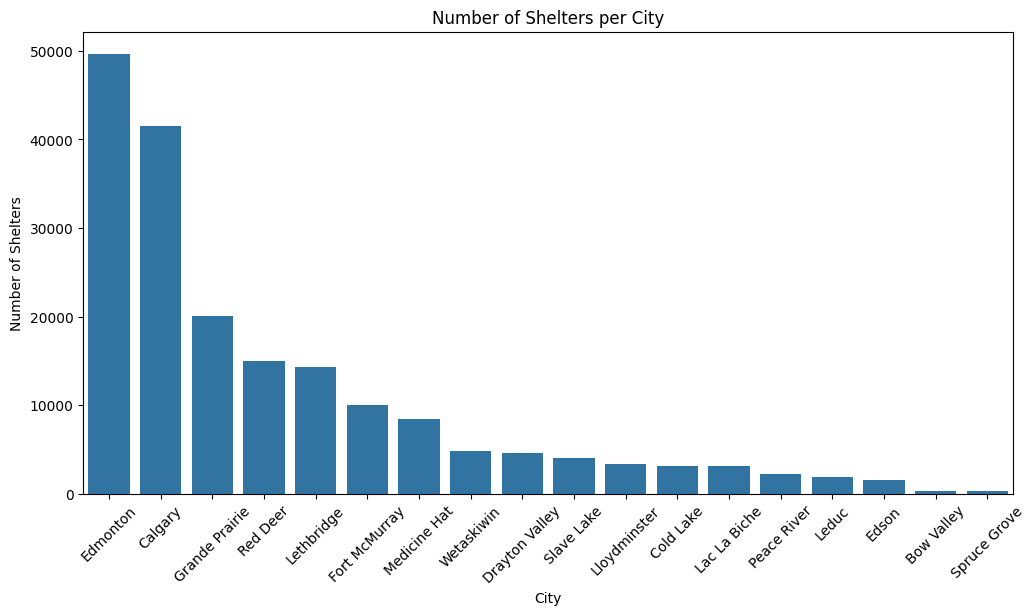

In [20]:
# Bar plot of number of shelters per city
plt.figure(figsize=(12, 6))

sns.countplot(x=df['city'], order=df['city'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel("City")
plt.ylabel("Number of Shelters")
plt.title("Number of Shelters per City")
plt.show()

This bar chart illustrates the distribution of shelters across different cities, highlighting Edmonton and Calgary as the cities with the highest number of shelters, with Edmonton slightly exceeding Calgary. The chart also shows a significant drop in shelter numbers for other cities like Grande Prairie, Red Deer, and Lethbridge, which rank next in shelter counts. The rest of the cities, such as Medicine Hat, Wetaskiwin, and Cold Lake, have comparatively fewer shelters, showing a steep decrease after the top five cities. This pattern indicates a concentration of shelters in larger urban areas.

In [10]:
# Strip any whitespace from column names
df.columns = df.columns.str.strip()

# Confirm column names are cleaned
print(df.columns)


Index(['date', 'city', 'ShelterName', 'Capacity', 'Overnight', 'year', 'month',
       'day'],
      dtype='object')


In [11]:
df['Capacity'] = pd.to_numeric(df['Capacity'], errors='coerce')
df['Overnight'] = pd.to_numeric(df['Overnight'], errors='coerce')

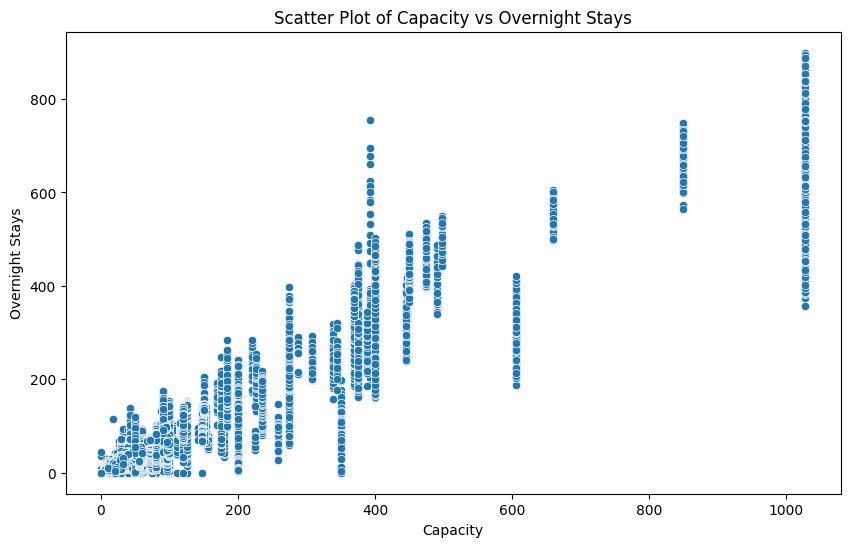

In [12]:
# Step 5: Bivariate Analysis

import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for Capacity vs Overnight stays
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Capacity', y='Overnight', data=df)
plt.title('Scatter Plot of Capacity vs Overnight Stays')
plt.xlabel('Capacity')
plt.ylabel('Overnight Stays')
plt.show()


This scatter plot demonstrates the relationship between shelter capacity and the number of overnight stays. The positive correlation indicates that as the capacity of a shelter increases, the number of overnight stays also tends to rise. However, the data shows variability, with some shelters having high capacities but lower overnight stays, and others with smaller capacities having relatively high usage. The trend suggests that shelters with greater capacity generally accommodate more overnight stays, reflecting their ability to serve a larger population.

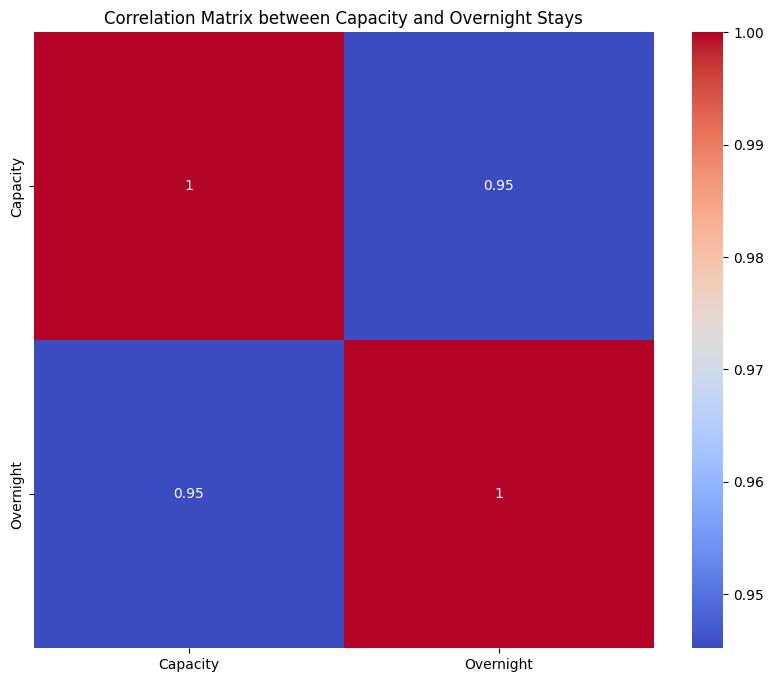

In [13]:
# Correlation matrix for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Capacity', 'Overnight']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between Capacity and Overnight Stays')
plt.show()

This correlation matrix visually represents the relationship between shelter capacity and the number of overnight stays. The values indicate a strong positive correlation of 0.95 between the two variables, meaning that as shelter capacity increases, the number of overnight stays also tends to increase. The diagonal values of 1 indicate the perfect correlation of each variable with itself. This high correlation suggests that capacity is a significant factor in determining the number of overnight stays in shelters.

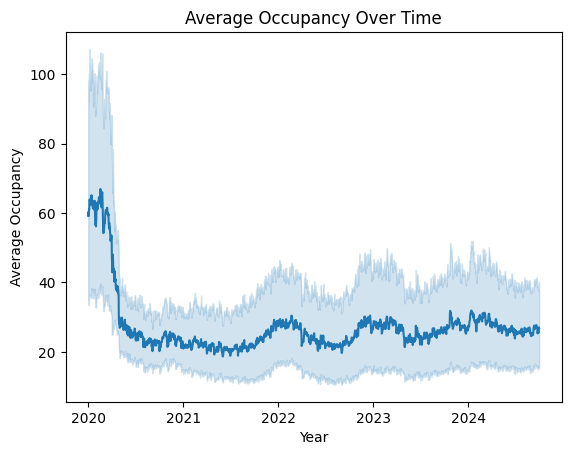

In [19]:
# Time Series Analysis

# Line plot for average occupancy over time

import seaborn as sns

# Assuming 'df' contains the occupancy data with 'date' and 'Overnight' columns
# If you have a separate DataFrame for monthly occupancy, replace 'df' with its name
sns.lineplot(data=df, x='date', y='Overnight')
plt.title('Average Occupancy Over Time')
plt.xlabel('Year')
plt.ylabel('Average Occupancy')
plt.show()

This graph shows the trend in average occupancy rates over a period of five years (2020–2024). The bold line represents the mean occupancy, while the shaded region indicates variability or confidence intervals around the average. There is a sharp decline in occupancy at the beginning of 2020, possibly due to significant events like the onset of the COVID-19 pandemic. Afterward, occupancy stabilizes and fluctuates moderately with seasonal or external influences, showing a steady yet uneven recovery.

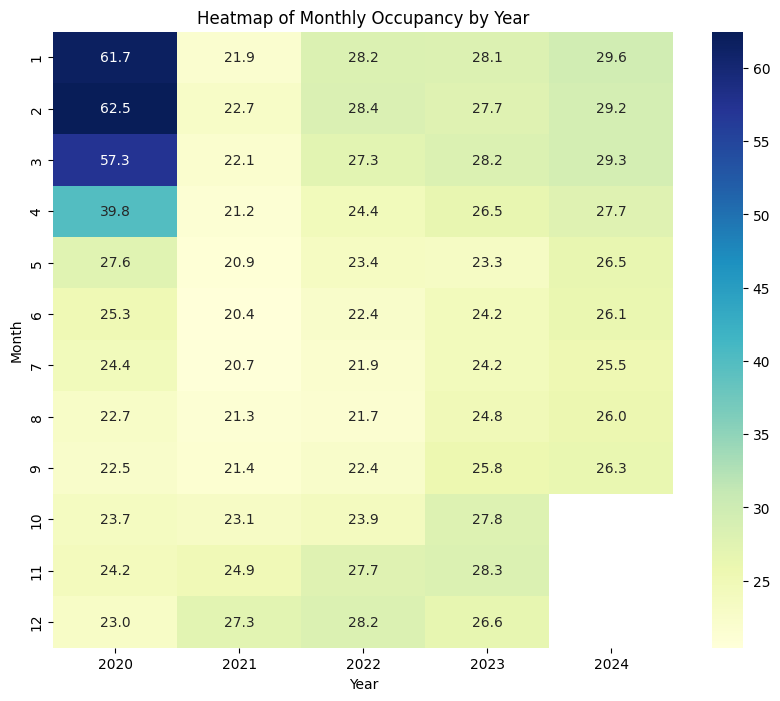

In [15]:
# Heatmap of Monthly Occupancy by Year

# Pivot the data for heatmap
occupancy_pivot = df.pivot_table(index='month', columns='year', values='Overnight', aggfunc='mean')

plt.figure(figsize=(10, 8))
sns.heatmap(occupancy_pivot, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Heatmap of Monthly Occupancy by Year")
plt.xlabel("Year")
plt.ylabel("Month")
plt.show()


The heatmap visualizes monthly average occupancy rates for the years 2020 to 2024. Darker shades correspond to higher occupancy, while lighter shades represent lower rates. The data reveals that early 2020 saw the highest occupancy (dark blue), which dropped sharply in subsequent months. Gradual increases in specific months of later years suggest seasonal trends or recovery efforts. For instance, year-end months (e.g., December) and mid-year periods appear to have consistently higher occupancy across the years.

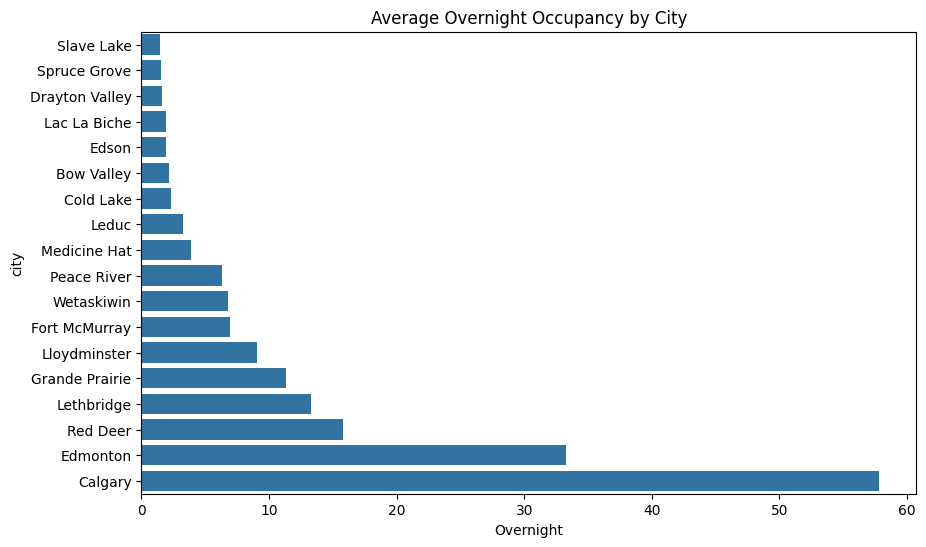

In [16]:
# Step 6: Correlation and Relationships

# Group by city to analyze average occupancy
city_occupancy = df.groupby('city')['Overnight'].mean().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=city_occupancy, y=city_occupancy.index)
plt.title("Average Overnight Occupancy by City")
plt.show()

This horizontal bar chart compares the average overnight occupancy rates across various cities. Calgary and Edmonton have significantly higher occupancy levels than other cities, reflecting their status as major urban centers or tourist hubs. In contrast, smaller or less populated cities, like Slave Lake and Bow Valley, have much lower average occupancy rates, indicating limited demand or capacity in those regions.